<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Kernelized_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel K-Means

## Purpose

In this exercise I built the K-means's clustering method from scratch increasing my awareness of how the clustering method works. K-means has its limits in that it only can separate clusters linearly. To mitigate this, I personally integrated a gaussian kernel which is a pair-wise comparison method designed to increase dimensionality to make linear separability possible.

## What is K-Means?

K-means clustering is one of the simplest and most popular unsupervised machine learning classification algorithms.

## Algorithm Steps

(a) Initial data \\
(b) Random centroids placed \\
(c) Assign data points to centroids \\
(d) Find mean and move centroids \\
(e) Assign data points to centroids \\
(f) Find mean and move centroids \\~\

Notice (c) and (d) repeat.

## K-Means in $\mathbb{R}^2$

This is an optimization problem. The goal is to minimize the variance with each cluster. This is accomplished by the following with $n$ being the number of datapoints and $k$ being the number of clusters.:
    
1. Given the previous assignments $s_1, \dots, s_n$, update the centroids, minimizing the mean spread of each cluster:
\begin{align}
\min{\mu_j \in \mathbb{R}^p \text{ for } j=1,\dots,k}
\end{align}

2. Given fixed $µ_1, \dots , µ_k$, assign each $x_i$ to its closest centroid, minimzing the sum of the distance of each assignment:    
\begin{align}
s_i \in \{1,\dots,k\} \text{ for } i=1,\dots,n
\end{align}

\begin{align}
&\min_{\substack{
    \mu_j \in \mathbb{R}^p \text{ for } j=1,\dots,k\\
    s_i \in \{1,\dots,k\} \text{ for } i=1,\dots,n
    }
} \sum_{i=1}^n {\left|\left|{x-\mu_i}\right|\right|}^2_2
\end{align}

## K-Means in $\mathbb{R}^\mathcal{H}$

We kernelize the optimization formula:

\begin{align}
&\min_{
    \substack{
        \mu_j \in
            \color{red}{
                \mathbb{R}^{\mathcal{H}}
            }
            \text{ for } j=1,\dots,k\\
        s_i \in \{1,\dots,k\} \text{ for } i=1,\dots,n
    }
} \sum_{i=1}^n {
    \left|\left|{
        \color{red}{K \left( \cdot, x_i \right) } -\mu_i
    }\right|\right|
}^2_\mathcal{H}
\end{align}

where $s_i$ is the assignment of $x_i$ to the cluster $C_j$.

We simplify by using the center of mass formula which solves the first optimization.

The center of mass formula for any given cluster... :
\begin{align}
& \mu = \frac{1}{n}\sum^n_{i=1} K \left( \cdot, x_i \right)
\end{align}

...solves the optimization need:
\begin{align}
& \substack{
    \text{min}\\
    \mu \in \mathcal{H}
} {
    {\left|\left|
        K \left( \cdot, x \right) - \mu
    \right|\right|}^2_\mathcal{H}
}
\end{align}

We therefore optimize by minimzing the sum of the distance of each assignment:

\begin{align}
&\substack{
    \text{min}\\
    S_i \in \text{argmin}\\
    s \in \{ 1, \dots, k \}
} {\left|\left|{
    K \left( \cdot, x_i \right) -
    \frac{1}{|C_s|} \sum_{j \in C_s }
    K \left( \cdot, x_j \right)
    }^2_\mathcal{H}
\right|\right|}
\end{align}

where $|C_s|$ is the cardinality of the cluster (number of data points assigned to that cluster), $C_s$ is the binary $(|C_s|,k)$ allocation matrix which only contains rows of data points where $x_i \in C_s$, that is the data-point $x_i$ belongs to the cluster $C_s$.

\begin{eqnarray*}
  &=& \left<
      K \left( \cdot, x_i \right) -
      \frac{1}{|C_s|} \sum_{j \in C_s }
      K \left( \cdot, x_j \right) \;
      , \;
      K \left( \cdot, x_i \right) -
      \frac{1}{|C_s|} \sum_{j \in C_s }
      K \left( \cdot, x_j \right)
  \right> \\
  &=& {
    \left|\left|{
      K \left( \cdot, x_i \right)
    }
  \right|\right|}^2_\mathcal{H}
      - 2 \left<
          K \left( \cdot, x_i \right) \;
          , \;
          \frac{1}{|C_s|} \sum_{j \in C_s }
          K \left( \cdot, x_j \right)
      \right>
      + {\left|\left|{
          \frac{1}{|C_s|} \sum_{j \in C_s }
          K \left( \cdot, x_j \right)
        }\right|\right|
      }^2_\mathcal{H} \\
  &=& K \left( x_i, x_i \right) - 2 \frac{1}{|C_s|} \sum_{j \in C_s} \left<
      K \left( \cdot, x_i \right) \;
      , \;
      K \left( \cdot, x_j \right)
  \right> + \left<
      \frac{1}{|C_s|} \sum_{j \in C_s }
      K \left( \cdot, x_j \right) \;
      , \;
      \frac{1}{|C_s|} \sum_{j \in C_s }
      K \left( \cdot, x_j \right)
  \right> \\
  &=& K \left( x_i, x_i \right) - 2 \frac{1}{|C_s|} \sum_{j \in C_s} K \left( x_i, x_j \right) +
  \frac{1}{{|C_s|}^2} \sum_{j \in C_s} \sum_{l \in C_s} K \left( x_j, x_l \right)
\end{eqnarray*}

## In Linear Algebraic Notation

Now, to optimize our code we convert this formula to matrix notation:\\
Let $V$ be an $(n,k)$ matrix.
\begin{eqnarray*}
    V &=& K \left( x_i, x_i \right) - 2 \frac{1}{|C_s|} \sum_{j \in C_s} K \left( x_i, x_j \right) + \frac{1}{{|C_s|}^2} \sum_{j \in C_s} \sum_{l \in C_s} K \left( x_j, x_l \right)  \\
    V &=& V_1 - V_2 + V_3
\end{eqnarray*}

We can then compute the minimum of each row of V and compute the new assignment  $\tilde{C}$.

This pairwase comparison matrix compares each data point with itself.
$$
V_1 = \begin{bmatrix}
    K(x_1,x_1) & K(x_1,x_1) & \dots & K(x_1,x_1) \\
    K(x_2,x_2) & K(x_2,x_2) & \dots & K(x_2,x_2) \\
    \vdots & \vdots & \ddots & \vdots \\
    K(x_n,x_n) & K(x_n,x_n) & \dots & K(x_n,x_n)
\end{bmatrix}
$$
   
Also this can be notated as:
$V_1 = diag(K)\mathbb{I}_k^T$
where $diag(K)$ is the $(n,1)$ diagonal of $K$ and $\mathbb{I}_k$ is the $(k,1)$ vector $(1,1,\ldots,1)^T$.

This pairwise comparison matrix compares each datapoint with all other datapoints.
$$
V_2 = \begin{bmatrix}
    \frac{-2}{|C_1|}\sum_{l \in C_1}K(x_1,x_l) &
    \frac{-2}{|C_2|}\sum_{l \in C_2}K(x_1,x_l) & \dots &
    \frac{-2}{|C_k|}\sum_{l \in C_k}K(x_1,x_l) \\
    \frac{-2}{|C_1|}\sum_{l \in C_1}K(x_2,x_l) &
    \frac{-2}{|C_2|}\sum_{l \in C_2}K(x_2,x_l) & \dots &
    \frac{-2}{|C_k|}\sum_{l \in C_k}K(x_2,x_l) \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{-2}{|C_1|}\sum_{l \in C_1}K(x_n,x_l) &
    \frac{-2}{|C_2|}\sum_{l \in C_2}K(x_n,x_l) & \dots &
    \frac{-2}{|C_k|}\sum_{l \in C_k}K(x_n,x_l) \\
\end{bmatrix}
$$

Also this can notated as $V2 = −2KCD^{−1}$ where $D$ is a $(k, k)$ matrix with diagonal $C^T C$, $C$ is the binary $(n,k)$ allocation matrix where $[C]_{ij}=1$ if and only if $x_i \in C_j$ (that is the data point $x_i$ belongs to the cluster $C_j$).

This pairwise comparison matrix compares data points that are within the same cluster.

$$
V_3 = \begin{bmatrix}
    \frac{1}{{|C_1|}^2}\sum_{j,l \in C_1}K(x_j,x_l) &
    \frac{1}{{|C_2|}^2}\sum_{j,l \in C_2}K(x_j,x_l) & \dots &
    \frac{1}{{|C_k|}^2}\sum_{j,l \in C_k}K(x_j,x_l) \\
    \frac{1}{{|C_1|}^2}\sum_{j,l \in C_1}K(x_j,x_l) &
    \frac{1}{{|C_2|}^2}\sum_{j,l \in C_2}K(x_j,x_l) & \dots &
    \frac{1}{{|C_k|}^2}\sum_{j,l \in C_k}K(x_j,x_l) \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{1}{{|C_1|}^2}\sum_{j,l \in C_1}K(x_j,x_l) &
    \frac{1}{{|C_2|}^2}\sum_{j,l \in C_2}K(x_j,x_l) & \dots &
    \frac{1}{{|C_k|}^2}\sum_{j,l \in C_k}K(x_j,x_l) \\
\end{bmatrix}
$$

This can also be notated as
$V_3 = \mathbb{I}_n (diag(C^TKC))^T D^{-2}$ where $D^{-2}$ is a $(k,k)$ matrix, and $\mathbb{I}_n$ is the $(k,1)$ vector $(1,1,\ldots,1)^T$. $diag(C^T K C)$ is the $(n,1)$ diagonal of $C^T K C$ (where $k > 1$ is the clusters)

## Imports

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score
import random
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import metrics

# Kernels

A collection of vectorized kernel functions x, and y are assumed to be Matrices if you want to evaluate on a single point reshape the vectors from d to d x 1, this will turn them into matrices. All the kernel functions work with vectors or matrices with the exception of k5v which requires matrices as inputs. (This has been fixed with the `AutoReshaper()` function).

## [`k1v`] Linear Kernel

Linear kernel, notice, if x, and y are vectors, this will return a scalar if x, and y are matrices, this will  return a matrix and this is an efficient and vectorized implementation of the linear kernel function.

In [ ]:
def k1v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return x@y.T

## [`k2v`] Affine Kernel

Affine kernel. Again, if x and y are  vectors, this will return a scalar but if x, and y are matrices this is a vectorized version of the affine kernel.

In [ ]:
def k2v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (x@y.T)+1

## [`k3v`] Quadratic Kernel

Quadratic kernel. Again, if x and y are vectors, this will return a scalar but if x, and y are matrices this is a vectorized version of the Quadratic kernel.

In [ ]:
def k3v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (1+(x@y.T))**2

## [`k4v`] $4^{th} $ Order Kernel


In [ ]:
# dth order kernel, (here d=4)
d = 4
def k4v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (1+(x@y.T))**d

## [`k5v`] Gaussian Kernel

Gaussian kernel. This is the only kernel function in this set of example kernels that is tricky to efficiently vectorize. This is because to evaluate this kernel function, we have to evaluate $(x-y)^T(x-y)$ whereas in all the other examples, we evaluate $x^Ty$.

Expanding $(x-y)^T(x-y)$ gives us $x^Tx - 2x^Ty + y^Ty$.

So, $k(x_i,y_j) = e^{-(x_i-y_j)^T(x_i-y_j)/(2\sigma^2)}$.

So, $k(x_i,x_j) = f(x_i^Tx_i+y_j^Ty_j-2x_i^Ty_j)$.

We get $x_i^Ty_j$ using `np.dot(X,Y)` where `X` and `Y` are the $X$ and $Y$ data matrices respectively. You can also use `X@Y.T` which is the same as `np.dot`.

We get $x_i^Tx_i$ using `np.sum(X*X,axis=1).reshape(d,1)`. This function requires matrices and will fail if `x`, or `y` are vectors. It is vectorized and efficient. For any kernel function that uses $k(x_i,x_j) = f\left((x_i-x_j)^T(x_i-x_j) \right)$ use the line that computes `XminusYSquared` to compute the matrix whose `i`,`jth` entry is $(x_i-x_j)^T(x_i-x_j)$ in a vectorized and efficient manner. Then apply `f(XminusYsquared)`.

Sigma $\sigma$, `sigma` can be picked for the specific problem at hand

In [ ]:
def k5v(x,y, sigma=2):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    numxPoints = np.shape(x)[0]
    numyPoints = np.shape(y)[0]
    XminusYSquared = np.sum(x*x,axis=1).reshape([numxPoints,1])-2*(x@y.T)+np.sum(y*y,axis=1).reshape([1,numyPoints])
    return np.exp(-XminusYSquared/(2*sigma**2))

## [`k6v`] Hyperbolic Tangent Kernel

In [ ]:
# Hyperbolic tangent vectorized kernel function
def k6v(x,y, kappa=1, theta=1):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (np.tanh(kappa*(x@y.T)+theta));

## [`k7v`] "Radial" Kernel

In [ ]:
# Some explicit kernel that doesn't have a name,
# but we're using it for circular data
def k7v(x,y):
  if y.shape[0] == 0 and x.shape[0] == 0:
    return k1v(x,y)
  xsq = np.sum(np.square(x),axis=1)
  ysq = np.sum(np.square(y),axis=1)
  return k1v(xsq,ysq)

# Helper Functions

## Global Variables

In [ ]:
_epsilon = 1.0e-10

## Auto Reshaper

In [ ]:
# This function checks if the numpy array has been reshaped to a dimension
#  larger than 1.
def AutoReshaper(arr):
  if arr.ndim == 1:
    return arr.reshape(len(arr), 1)
  return arr

## Scipy Make Data

In [ ]:
from sklearn.datasets import make_classification

def MakeScipyMakeData(n=100, feats=2, classes=2):
  X, y = make_classification(
      n_samples=n,
      n_features=2,
      n_redundant=0,
      n_classes=classes,
      random_state=0,
      shuffle=False
  )
  return X, y

## Make Toy Dataset

In [ ]:
def MakeToyDataset():
  data = {
    'x1': [1,1,2,2,3,3,4,5,4,5],
    'x2': [1,2,1,2,2,4,4,4,5,5],
    'y' : [1,1,1,1,1,-1,-1,-1,-1,-1]
  }
  return pd.DataFrame(data)

In [ ]:
def PlotToyDataset(funcDF):
  pos = funcDF[funcDF['y'] == 1]
  neg = funcDF[funcDF['y'] == -1]
  plt.figure(figsize=(4,4))
  plt.scatter(pos['x1'], pos['x2'], color='r')
  plt.scatter(neg['x1'], neg['x2'], color='b')
  plt.show()

## Make Blobs Dataset

In [ ]:
from sklearn.datasets import make_blobs

def MakeBlobsDataset(n=10, c=3, f=2):
  X, y = make_blobs(
      n_samples=n,
      centers=c,
      n_features=f,
      random_state=101
  )
  return AutoReshaper(X), AutoReshaper(y)

In [ ]:
from sklearn.datasets import make_circles

def MakeCirclesDataset(n=10):
  X, y = make_circles(
    n_samples=n,
    factor=0.50,
    noise=0.05
  )
  return AutoReshaper(X), AutoReshaper(y)

## Plot

In [ ]:
def PlotAssignments(fX, assignments):
  width = 8
  iters = len(assignments)
  fig, axes = plt.subplots(
      nrows=iters,
      ncols=1,
      figsize=(width,iters*width)
  )

  for i, a in enumerate(assignments):
    a = AutoReshaper(a)
    pltdf = pd.DataFrame(np.concatenate((fX,a),axis=1))
    sns.scatterplot(
        data=pltdf,
        x=0,
        y=1,
        hue=2,
        palette="Set1",
        ax=axes[i],
        legend=False
    )

In [ ]:
def PlotAssignment(fX, a):

  pltdf = pd.DataFrame(np.concatenate((fX,a),axis=1))
  sns.scatterplot(
      data=pltdf,
      x=0,
      y=1,
      hue=2,
      palette="Set2",
      legend=False
  )

In [ ]:
# Only plots the first two columns of the dataset
def PlotDataset(fX, fy):

  pltdf = pd.DataFrame(np.concatenate((fX,fy),axis=1))
  sns.scatterplot(
      data=pltdf,
      x=0,
      y=1,
      hue=2,
      palette="Set2"
  )

## Randomly Init Clusters

In [ ]:
def RandomlyInitClusters(n=10, numClusters=3):
  c = [random.randint(0, numClusters-1) for i in range(n)]
  return AutoReshaper(np.array(c))

## Get Cluster Assignments

This function takes in the numpy array `A` which should be of shape (`n` ,$\mathbb{R}^d$+1) with `n` being the number of obervations and $\mathbb{R}^d$ being the dimension of your dataset, +1 column for the labels which are the current cluster assignments.

This function returns a list of clusters with the associated datapoints. Position 0 of the list represents the datapoints in cluster 1, and position 1 are the datapoints in cluster 2, and so on.

In [ ]:
# Returns a list of numpy arrays
def GetClusterAssignments(A, k):
  # Initialize the list of clusters
  clusters = []
  for i in range(k):
    labeledDatapoints = A[np.where(A[:,-1] == i)]
    if labeledDatapoints.shape[0] > 0:
      unlabeledDatapoints = np.delete(labeledDatapoints, -1, axis=1)
      # Append the list of datapoints
      clusters.append(unlabeledDatapoints)
    else:
      # Append an empty set
      clusters.append(np.array([]))

  return clusters

## Formula Matricies

### V1

This section of the formula compares each datapoint with itself. This is the equivalent of:
$$K(x_i, x_i)$$

In [ ]:
def GetV1(X, k, kernel):
  v1 = AutoReshaper(np.diag(kernel(X,X)))
  return np.tile(v1, k)


# this might be faster since there are only a small number of clusters
# T = 0
# for i in range(10):
#   x_i = AutoReshaper(X[0,:]).T
#   T += kernel(x_i,x_i)
# T

### V2

In [ ]:
def GetV2(X, clusters, kernel):
  n = X.shape[0]
  V2ClusterSum = []
  for cluster in clusters:
    # Default column sum
    colSum = np.ones(n)*_epsilon
    # What happens here is the cluster is empty?
    cSize = float(cluster.shape[0])
    if cSize > 0:
      mu = (1/cSize)
      K = kernel(X, cluster)
      colSum = mu * np.sum(K, axis=1)

    V2ClusterSum.append(AutoReshaper(colSum))

  V2 = np.concatenate(V2ClusterSum, axis=1)

  return V2

### V3

In [ ]:
def GetV3(clusters, n, k, kernel):
  V3ClusterSum = []
  for cluster in clusters:
    cSize = cluster.shape[0]
    mu = (1/cSize**2) if cSize > 0 else 0
    doubleSum = AutoReshaper(np.sum(kernel(cluster, cluster)))
    V3ClusterSum.append(mu * doubleSum)

  v3 = np.array(V3ClusterSum)

  return np.tile(v3, n).reshape(n,k)

## Kernel K-Means

In [ ]:
def CentroidMovement(x, y):
  return np.sum(np.abs(x-y))


In [ ]:
def KernelKMeans(X, clusterCount=3, maxIterations=20, kernel=k1v):
  k = clusterCount
  n = X.shape[0]
  assignments = []
  init_y = RandomlyInitClusters(n=X.shape[0])
  assignments.append(init_y)
  iterations = 0
  for i in range(maxIterations):
    iterations += 1
    A = np.concatenate((X, assignments[i]), axis=1)
    clusters = GetClusterAssignments(A, k)
    V1 = GetV1(X, k, kernel)
    V2 = GetV2(X, clusters, kernel)
    V3 = GetV3(clusters, n, k, kernel)
    V = V1-2*V2+V3

    prvAssignments = assignments[-1]
    newAssignments = AutoReshaper(np.argmin(V, axis=1))
    assignments.append(newAssignments)

    # check for break condition
    if CentroidMovement(newAssignments,prvAssignments) < 1.0e-3:
        return assignments

  return assignments

## Get Results DataFrame

In [ ]:
def GetResultsDF(fX, fy, clusterCount=2):

  fy = fy.flatten()

  # Create a list of kernels and alphas
  kernels = [k1v, k2v, k3v, k4v, k5v, k6v, k7v]
  kernelNames = [
    "Linear",
    "Affine",
    "Quadratic",
    "4th Order",
    "Gaussian",
    "HyperbolTan",
    "'Radial'"
  ]

  # Create an empty dictionary to store the data
  randScores = []
  fowlksMallowScores = []
  mutualInfoScores = []
  iterations = []

  for i, kernel in enumerate(kernels):

    # Gets the k-means clustering assignments
    assignments = KernelKMeans(fX, clusterCount=clusterCount, kernel=kernel)
    latestAssignment = assignments[-1].flatten()
    rndsc = metrics.adjusted_rand_score(latestAssignment, fy)
    fms = metrics.fowlkes_mallows_score(latestAssignment, fy)
    mis = metrics.mutual_info_score(latestAssignment, fy)


    # Store the results for this kernel
    randScores.append(rndsc)
    fowlksMallowScores.append(fms)
    mutualInfoScores.append(mis)
    iterations.append(len(assignments))

  # Return the results dataframe
  results = {}
  results["AdjRandScores"] = randScores
  results["FlksMallowScores"] = fowlksMallowScores
  results["MutualInfoScores"] = mutualInfoScores
  results["iterations"] = iterations
  return pd.DataFrame(results, index=kernelNames).T

# Testing

## Toy Dataset

In [ ]:
toyDF = MakeToyDataset()

## Small Blob Dataset $\in \mathbb{R}^2$

In [ ]:
X, y = MakeBlobsDataset(n=10, c=3)
X.shape

(10, 2)

In [ ]:
y.shape

(10, 1)

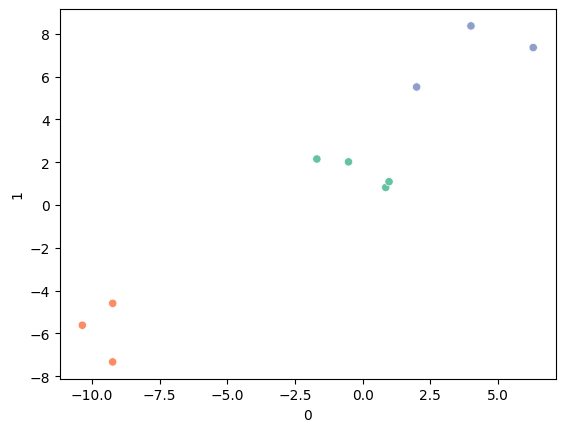

In [ ]:
PlotAssignment(X,y)

In [ ]:
assignments = KernelKMeans(X)

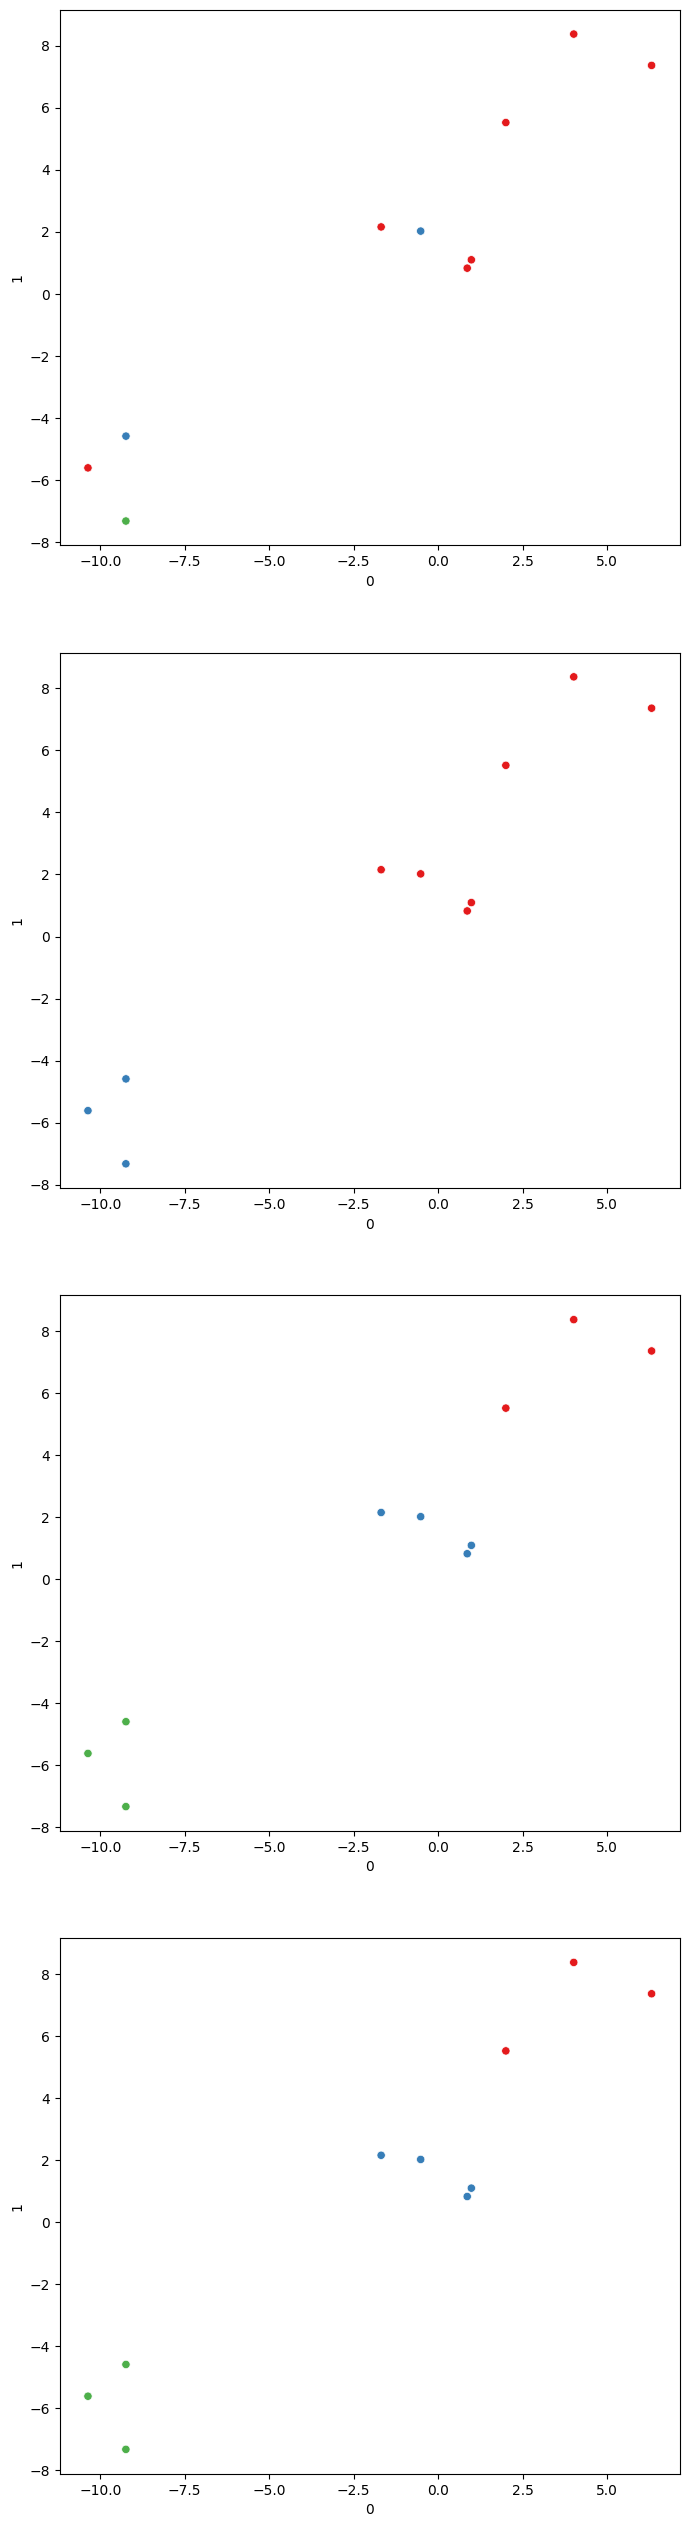

In [ ]:
PlotAssignments(X, assignments)

## Large Blob Dataset $\in \mathbb{R}^2$

In [ ]:
X, y = MakeBlobsDataset(n=1000, c=5, f=2)
X.shape

(1000, 2)

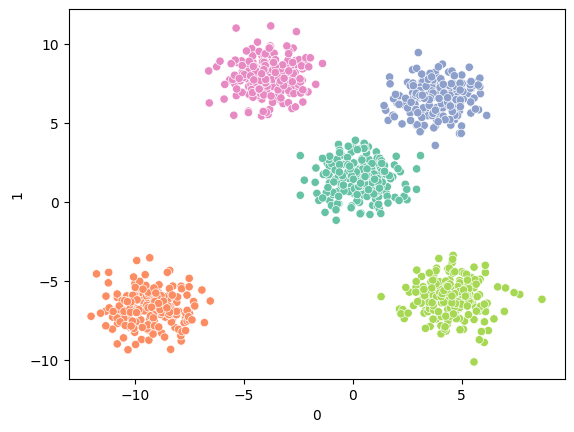

In [ ]:
PlotAssignment(X,y)

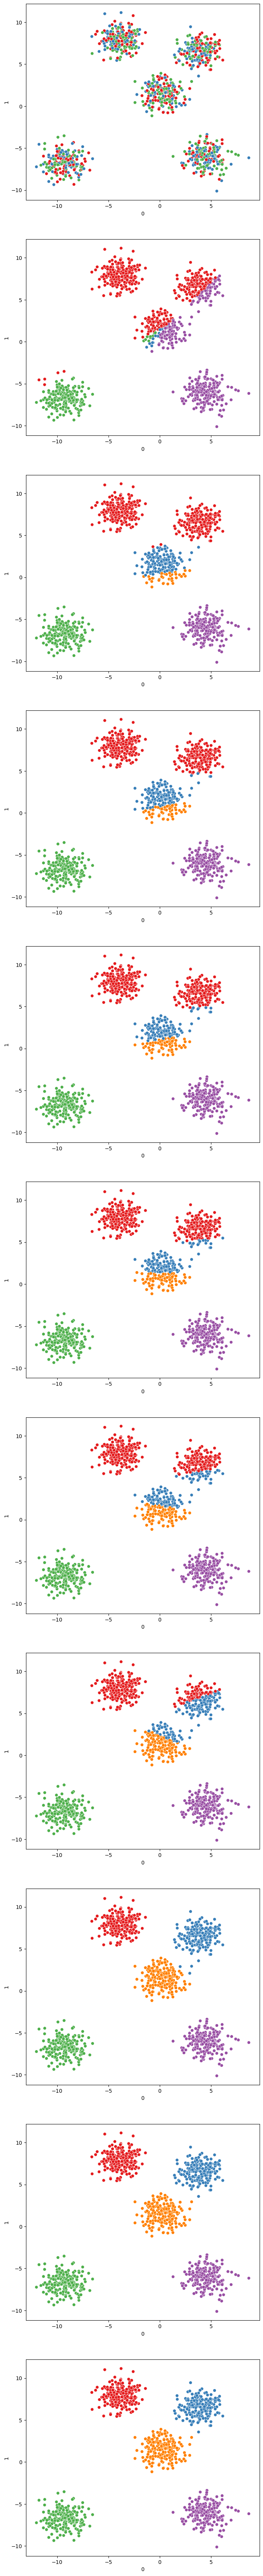

In [ ]:
# assignments = KernelKMeans(X)
assignments = KernelKMeans(X, clusterCount=5)
PlotAssignments(X, assignments)


## Large Make Circles

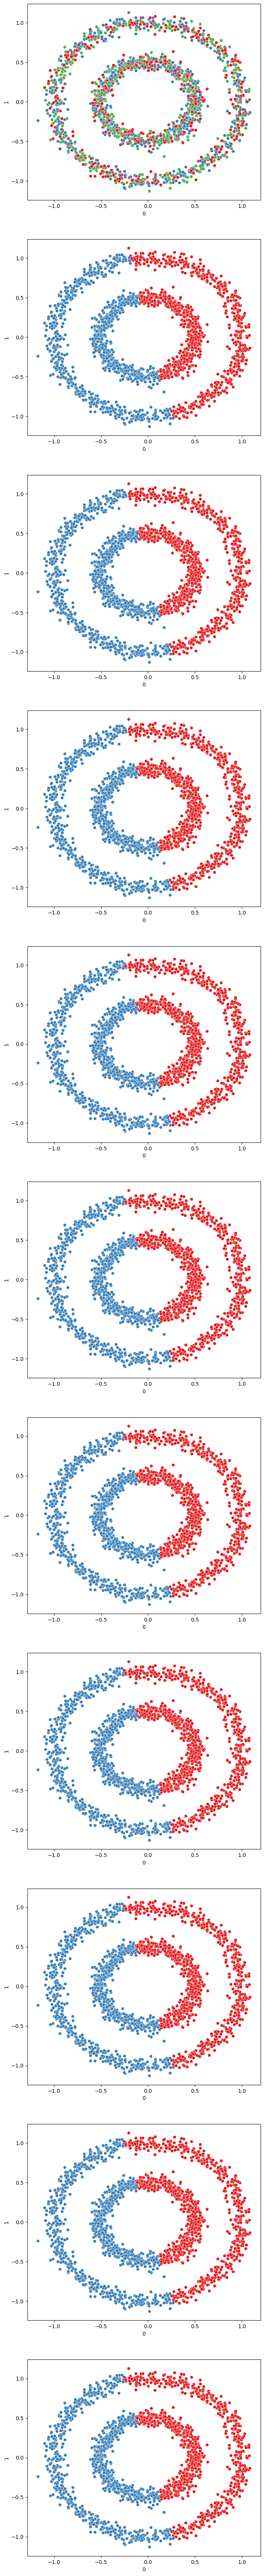

In [ ]:
X, y = MakeCirclesDataset(n=2000)
assignments = KernelKMeans(X, clusterCount=2, kernel=k5v)
PlotAssignments(X,assignments)

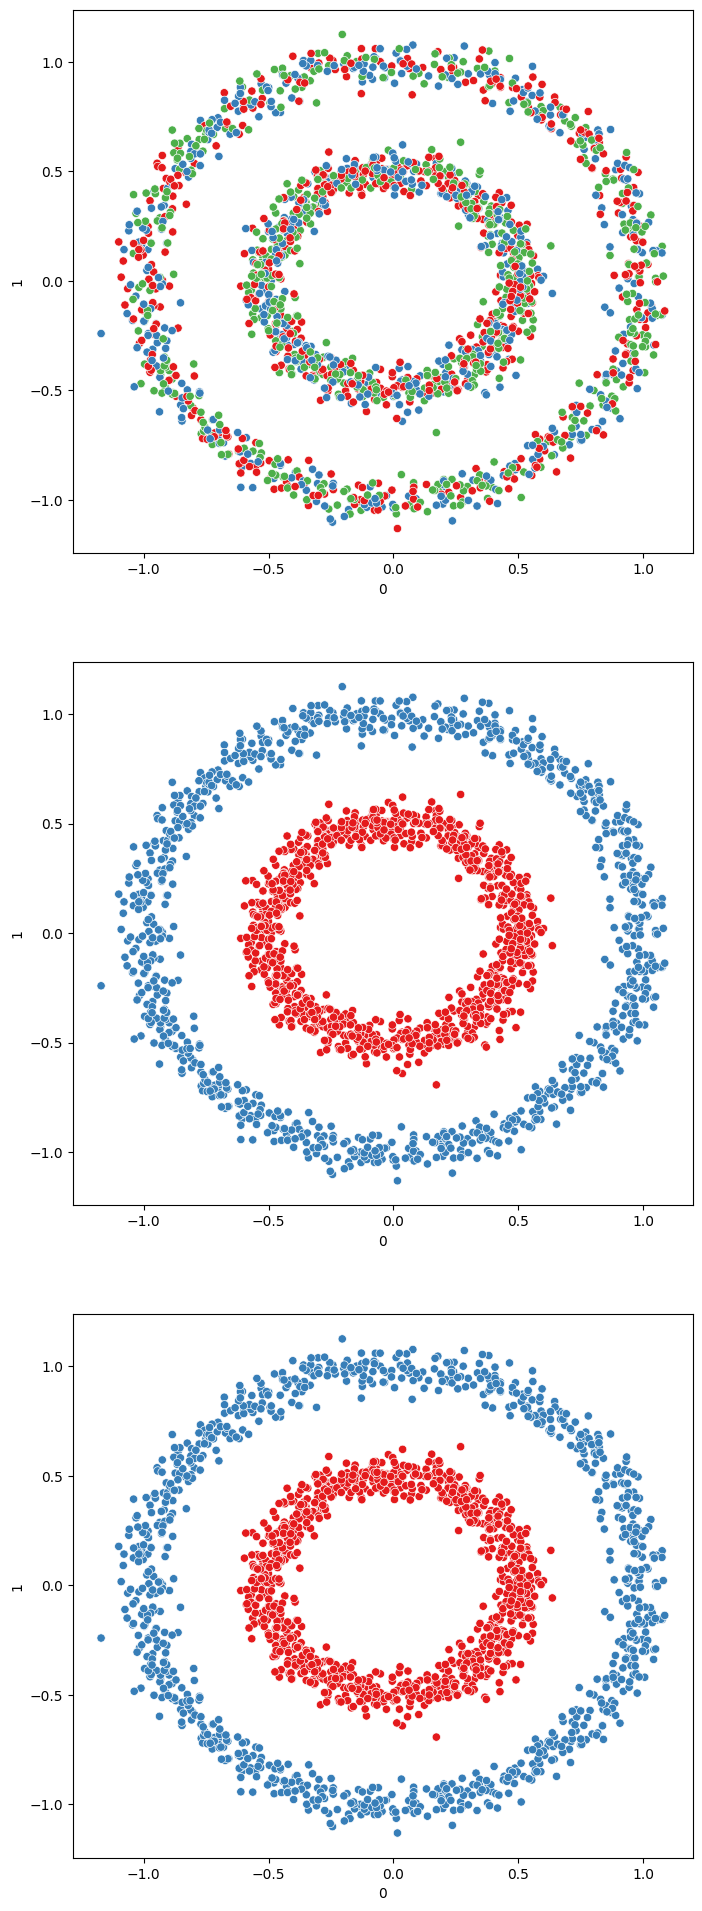

In [ ]:
assignments = KernelKMeans(X, clusterCount=2, kernel=k7v)
PlotAssignments(X,assignments)

# Success Metrics

In [ ]:
X, y = MakeCirclesDataset(n=100)
GetResultsDF(X,y).round(2).T

AdjRandScores  FlksMallowScores  MutualInfoScores  iterations
Linear               -0.01              0.49              0.00         4.0
Affine               -0.01              0.49              0.00         3.0
Quadratic            -0.01              0.49              0.00         5.0
4th Order             0.22              0.66              0.20         6.0
Gaussian             -0.01              0.49              0.00         6.0
HyperbolTan          -0.01              0.49              0.00         5.0
'Radial'              1.00              1.00              0.69         3.0

In [ ]:
clusterCount = 5
X, y = MakeBlobsDataset(n=1000, c=clusterCount, f=2)
GetResultsDF(X,y,clusterCount).round(2).T

AdjRandScores  FlksMallowScores  MutualInfoScores  iterations
Linear                1.00              1.00              1.61        12.0
Affine                1.00              1.00              1.61        11.0
Quadratic             0.86              0.88              1.40         9.0
4th Order             0.52              0.63              1.03        18.0
Gaussian              1.00              1.00              1.61         7.0
HyperbolTan           0.40              0.56              0.84        21.0
'Radial'              0.43              0.55              0.87        21.0

In [ ]:
clusterCount = 2
X, y = MakeBlobsDataset(n=1000, c=clusterCount, f=4000)
GetResultsDF(X,y,clusterCount).round(2).T

AdjRandScores  FlksMallowScores  MutualInfoScores  iterations
Linear                1.00              1.00              0.69         3.0
Affine                1.00              1.00              0.69         3.0
Quadratic             1.00              1.00              0.69         3.0
4th Order             1.00              1.00              0.69         3.0
Gaussian             -0.00              0.53              0.00         3.0
HyperbolTan           1.00              1.00              0.69         4.0
'Radial'              0.06              0.53              0.03         5.0